/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


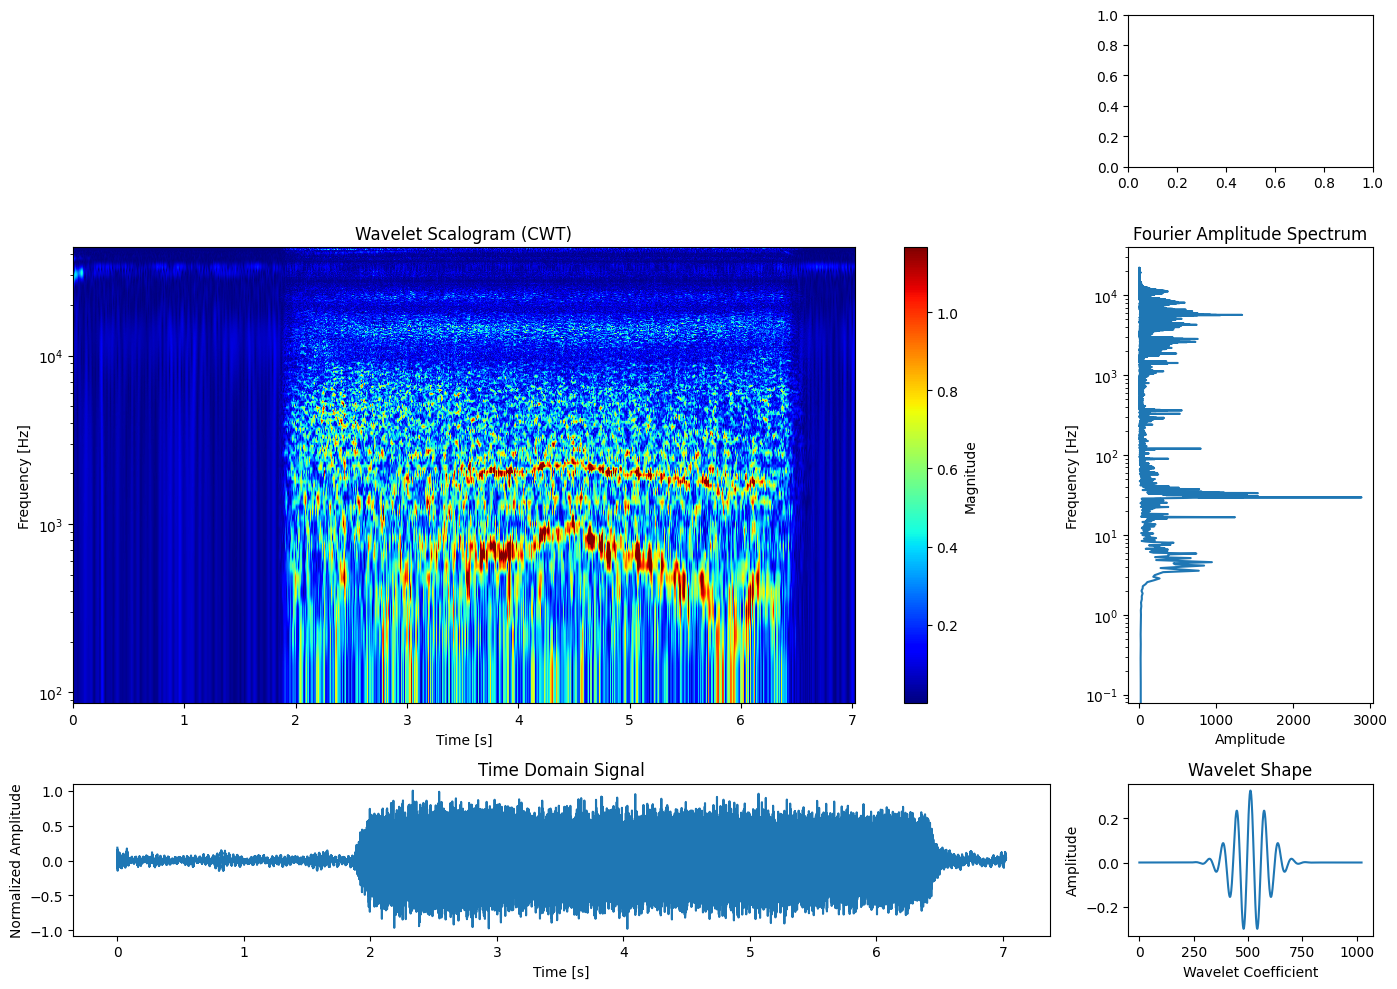

In [1]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import warnings
from scipy.io.wavfile import WavFileWarning

# Suppress WavFileWarning
warnings.filterwarnings("ignore", category=WavFileWarning)

# Step 1: Load WAV file
file_path = '/Users/maxfollett/Desktop/MixPre-107u.WAV'  
rate, data = wavfile.read(file_path)

# If the file has two channels (stereo)
if len(data.shape) > 1:
    data = data[:, 0]

# Normalize the data to the range [-1, 1] (only if max_val is not 0)
max_val = np.max(np.abs(data))
if max_val != 0:
    data = data / max_val

# Step 2: Time vector
time = np.arange(0, len(data)) / rate

# Step 3: Perform Continuous Wavelet Transform (CWT)
wavelet = 'cmor3.0-1.0'  # Adjust bandwidth for better frequency resolution
scales = np.arange(1, 512)  # More scales for better frequency resolution

# Perform the CWT to get coefficients and frequencies
coefficients, frequencies = pywt.cwt(data, scales, wavelet, sampling_period=1/rate)

# Compute the Fourier transform for the frequency spectrum plot
fft_data = np.fft.fft(data)
frequencies_fft = np.fft.fftfreq(len(fft_data), d=1/rate)
amplitudes_fft = np.abs(fft_data)

# Step 4: Plot the wavelet shape (real part)
wavelet_function, _ = pywt.ContinuousWavelet(wavelet).wavefun(level=10)

# Step 5: Plotting the results
fig, ax = plt.subplots(3, 2, gridspec_kw={'width_ratios': [4, 1], 'height_ratios': [1, 3, 1]}, figsize=(14, 10))

# Time-domain signal (bottom left)
ax[2, 0].plot(time, data)
ax[2, 0].set_title('Time Domain Signal')
ax[2, 0].set_xlabel('Time [s]')
ax[2, 0].set_ylabel('Normalized Amplitude')

# CWT scalogram (middle left)
im = ax[1, 0].imshow(np.abs(coefficients), extent=[time.min(), time.max(), frequencies.min(), frequencies.max()],
                     cmap='jet', aspect='auto', vmax=np.max(np.abs(coefficients)) * 0.5)
ax[1, 0].set_title('Wavelet Scalogram (CWT)')
ax[1, 0].set_xlabel('Time [s]')
ax[1, 0].set_ylabel('Frequency [Hz]')
ax[1, 0].set_yscale('log')
fig.colorbar(im, ax=ax[1, 0], label='Magnitude')

# Fourier Amplitude Spectrum (right)
ax[1, 1].plot(amplitudes_fft[:len(amplitudes_fft)//2], frequencies_fft[:len(frequencies_fft)//2])
ax[1, 1].set_title('Fourier Amplitude Spectrum')
ax[1, 1].set_ylabel('Frequency [Hz]')
ax[1, 1].set_yscale('log')
ax[1, 1].set_xlabel('Amplitude')

# Wavelet Shape (bottom right)
ax[2, 1].plot(wavelet_function)
ax[2, 1].set_title('Wavelet Shape')
ax[2, 1].set_xlabel('Wavelet Coefficient')
ax[2, 1].set_ylabel('Amplitude')

# Hide top-left subplot
ax[0, 0].axis('off')

plt.tight_layout()
plt.show()